# Covid 19 Data modelling in R

https://docs.idmod.org/projects/emod-hiv/en/latest/model-overview.html

- [Finding beta in algeria](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7570398/pdf/42269_2020_Article_434.pdf)
- [Mean squared error](https://mathworld.wolfram.com/LeastSquaresFitting.html )
    - [Second link](https://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html )

In [1]:
# Clean Environment
rm(list = ls())
gc()

used    (Mb) gc trigger (Mb) max used (Mb)
Ncells  606715 32.5 1317020    70.4 1032460  55.2
Vcells 1132869  8.7 8388608    64.0 1821067  13.9

In [2]:
#install.packages("covid19.analytics")
# install.packages("dygraphs")
# install.packages("writexl")
# install.packages("xts")
# install.packages("deSolve")
# install.packages("reshape2")

In [3]:
# Import needed libraries
library(covid19.analytics)
library(dygraphs)
library(writexl)
library(xts)
library(deSolve)
library(reshape2)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




## Pull data

In [4]:
# reads time series data
all_confirmed_cases <- covid19.data("ts-confirmed")
all_confirmed_deaths <- covid19.data("ts-deaths")
all_confirmed_recoveries <- covid19.data("ts-recovered")

Data being read from JHU/CCSE repository



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


Reading data from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

Data retrieved on 2022-04-11 23:05:38 || Range of dates on data: 2020-01-22--2022-04-10 | Nbr of records: 284



-------------------------------------------------------------------------------- 


Data being read from JHU/CCSE repository



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


Reading data from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

Data retrieved on 2022-04-11 23:05:38 || Range of dates on data: 2020-01-22--2022-04-10 | Nbr of records: 284



-------------------------------------------------------------------------------- 


Data being read from JHU/CCSE repository



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


Reading data from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

Data retrieved on 2022-04-11 23:05:38 || Range of dates on data: 2020-01-22--2022-04-10 | Nbr of records: 269



-------------------------------------------------------------------------------- 


In [5]:
# all_confirmed_cases_info <- all_confirmed_cases[1:]
# all_confirmed_deaths_info <- 
# all_confirmed_recoveries_info <-

all_data_time_offset <- 365

all_confirmed_cases <- all_confirmed_cases[, 1:all_data_time_offset]
all_confirmed_deaths <- all_confirmed_deaths[, 1:all_data_time_offset]
all_confirmed_recoveries <- all_confirmed_recoveries[, 1:all_data_time_offset]

In [6]:
# Look at how the data is structured
View(all_confirmed_cases[100:150, ])

Province.State            Country.Region     Lat        Long      
100                           Croatia             45.100000   15.20000
101                           Cuba                21.521757  -77.78117
102                           Cyprus              35.126400   33.42990
103                           Czechia             49.817500   15.47300
104 Faroe Islands             Denmark             61.892600   -6.91180
105 Greenland                 Denmark             71.706900  -42.60430
106                           Denmark             56.263900    9.50180
107                           Diamond Princess     0.000000    0.00000
108                           Djibouti            11.825100   42.59030
109                           Dominica            15.415000  -61.37100
110                           Dominican Republic  18.735700  -70.16270
111                           Ecuador             -1.831200  -78.18340
112                           Egypt               26.820553   30.80250
113                           El Salvador         13.794200  -88.89650
114                           Equatorial Guinea    1.650800   10.26790
115                           Eritrea             15.179400   39.78230
116                           Estonia             58.595300   25.01360
117                           Eswatini           -26.522500   31.46590
118                           Ethiopia             9.145000   40.48970
119                           Fiji               -17.713400  178.06500
120                           Finland             61.924110   25.74815
121 French Guiana             France               3.933900  -53.12580
122 French Polynesia          France             -17.679700  149.40680
123 Guadeloupe                France              16.265000  -61.55100
124 Martinique                France              14.641500  -61.02420
125 Mayotte                   France             -12.827500   45.16624
126 New Caledonia             France             -20.904305  165.61804
127 Reunion                   France             -21.115100   55.53640
128 Saint Barthelemy          France              17.900000  -62.83330
129 Saint Pierre and Miquelon France              46.885200  -56.31590
130 St Martin                 France              18.070800  -63.05010
131 Wallis and Futuna         France             -14.293800 -178.11650
132                           France              46.227600    2.21370
133                           Gabon               -0.803700   11.60940
134                           Gambia              13.443200  -15.31010
135                           Georgia             42.315400   43.35690
136                           Germany             51.165691   10.45153
137                           Ghana                7.946500   -1.02320
138                           Greece              39.074200   21.82430
139                           Grenada             12.116500  -61.67900
140                           Guatemala           15.783500  -90.23080
141                           Guinea               9.945600   -9.69660
142                           Guinea-Bissau       11.803700  -15.18040
143                           Guyana               4.860416  -58.93018
144                           Haiti               18.971200  -72.28520
145                           Holy See            41.902900   12.45340
146                           Honduras            15.200000  -86.24190
147                           Hungary             47.162500   19.50330
148                           Iceland             64.963100  -19.02080
149                           India               20.593684   78.96288
150                           Indonesia           -0.789300  113.92130
    2020-01-22 2020-01-23 2020-01-24 2020-01-25 2020-01-26 2020-01-27 ⋯
100 0          0          0          0          0          0          ⋯
101 0          0          0          0          0          0          ⋯
102 0          0          0          0          0          0          ⋯
103 0          0        

In [7]:
indexList <- c()
countryList <- c()

# Get all rows
for (i in rownames(all_confirmed_cases)) {
    # print(c(i, all_confirmed_cases[i, 2]))
    indexList <- c(indexList, i)
    countryList <- c(countryList, all_confirmed_cases[i, 2])
}

country_index_list <- as.data.frame(cbind(indexList, countryList))

# We can see that Italy is index 154, so we are going to  use that
country_index <- 136

country_index_list[country_index, ]

indexList countryList
136 136       Germany

In [8]:
# For some reason, the recovered dataframe has different dimensions. Thanks CSSE at John Hopkins

recovery_indexList <- c()
recovery_countryList <- c()

# Get all rows
for (i in rownames(all_confirmed_recoveries)) {
    # print(c(i, all_confirmed_cases[i, 2]))
    recovery_indexList <- c(recovery_indexList, i)
    recovery_countryList <- c(recovery_countryList, all_confirmed_recoveries[i, 2])
}

recovery_country_index_list <- as.data.frame(cbind(recovery_indexList, recovery_countryList))

# View(recovery_country_index_list[(130:200), ])

# We can see that Italy is index 154, so we are going to  use that
recovery_country_index <- 121

recovery_country_index_list[recovery_country_index, ]

recovery_indexList recovery_countryList
121 121                Germany

In [9]:
it_confirmed_cases <- all_confirmed_cases[country_index, ]
it_confirmed_deaths <- all_confirmed_deaths[country_index, ]
it_confirmed_recoveries <- all_confirmed_recoveries[recovery_country_index, ]

print("Cases:")
View(it_confirmed_cases)
print("Deaths:")
View(it_confirmed_deaths)
print("Recoveries:")
View(it_confirmed_recoveries)

firstCaseDate <- "2020-01-31"

[1] "Cases:"


Province.State Country.Region Lat      Long     2020-01-22 2020-01-23
136                Germany        51.16569 10.45153 0          0         
    2020-01-24 2020-01-25 2020-01-26 2020-01-27 ⋯ 2021-01-07 2021-01-08
136 0          0          0          1          ⋯ 1835038    1866887   
    2021-01-09 2021-01-10 2021-01-11 2021-01-12 2021-01-13 2021-01-14
136 1891581    1908527    1921024    1933826    1953426    1978590   
    2021-01-15 2021-01-16
136 2000958    2019636

[1] "Deaths:"


Province.State Country.Region Lat      Long     2020-01-22 2020-01-23
136                Germany        51.16569 10.45153 0          0         
    2020-01-24 2020-01-25 2020-01-26 2020-01-27 ⋯ 2021-01-07 2021-01-08
136 0          0          0          0          ⋯ 37607      38795     
    2021-01-09 2021-01-10 2021-01-11 2021-01-12 2021-01-13 2021-01-14
136 39878      40343      40686      41577      42637      43881     
    2021-01-15 2021-01-16
136 44994      45974

[1] "Recoveries:"


Province.State Country.Region Lat      Long     2020-01-22 2020-01-23
121                Germany        51.16569 10.45153 0          0         
    2020-01-24 2020-01-25 2020-01-26 2020-01-27 ⋯ 2021-01-07 2021-01-08
121 0          0          0          0          ⋯ 1517019    1533143   
    2021-01-09 2021-01-10 2021-01-11 2021-01-12 2021-01-13 2021-01-14
121 1546206    1566907    1590171    1616761    1640682    1661394   
    2021-01-15 2021-01-16
121 1664176    1680479

In [10]:
# Find index of first case
firstInfection <- 0

for (i in 1:ncol(it_confirmed_cases)) {
    if (class(it_confirmed_cases[, i]) == 'integer' && it_confirmed_cases[, i] >= 1) {
        print(paste0("Index of the first infection is: ", i, ", Number of infections is: ", it_confirmed_cases[, i]))
        
        firstInfection <- it_confirmed_cases[, i]
        
        break
    }
}

[1] "Index of the first infection is: 10, Number of infections is: 1"


In [11]:
it_confirmed_cases <- t(it_confirmed_cases[, 5:dim(it_confirmed_cases)[2]])
colnames(it_confirmed_cases) <- c("Cases")
it_confirmed_cases <- as.xts(it_confirmed_cases)

In [12]:
it_confirmed_deaths <- t(it_confirmed_deaths[, 5:dim(it_confirmed_deaths)[2]])
colnames(it_confirmed_deaths) <- c("Deaths")
it_confirmed_deaths <- as.xts(it_confirmed_deaths)

In [13]:
it_confirmed_recoveries <- t(it_confirmed_recoveries[, 5:dim(it_confirmed_recoveries)[2]])
colnames(it_confirmed_recoveries) <- c("Recoveries")
it_confirmed_recoveries <- as.xts(it_confirmed_recoveries)

In [14]:
# Cleanup

rm("all_confirmed_cases", "all_confirmed_deaths", "all_confirmed_recoveries")

In [15]:
data_total <- as.xts(cbind(it_confirmed_cases, it_confirmed_deaths, it_confirmed_recoveries))
colnames(data_total) <- c("Cases", "Deaths", "Recoveries")

dygraph(data_total)

HTML widgets cannot be represented in plain text (need html)

In [16]:
# I don't know why I put estimated recoveries as cases - deaths + real recoveries, since a case can either go in death or in recovery, so it should only be cases - deaths.
# This might not be right either, since on the first day, we have 1 case, 0 deaths, and so ... 1 recovery? Not really.

# I did it because in my model you can't die, all you can do if be "recovered", which technically is both dead and recovered

# Since the recoveries in our data are skewed, I'll write a function which computes a pretty good estimate of the recoveries
compute_recoveries <- function(
    cases,
    deaths,
    data_recoveries,
    recovery_time = 14
) {
    estimated_recoveries <- cases - deaths + data_recoveries
    
    return_dataframe <- lag(estimated_recoveries, recovery_time)
    return_dataframe[1:recovery_time] <- 0
    
    return(return_dataframe)
}

#Since the recoveries in our data are skewed, I'll write a function which computes a pretty good estimate of the recoveries
# compute_recoveries <- function(
#     cases,
#     deaths,
#     recovery_time = 14
# ) {
#     estimated_recoveries <- cases - deaths
    
#     return_dataframe <- lag(estimated_recoveries, recovery_time)
#     return_dataframe[1:recovery_time] <- 0
    
#     return(return_dataframe)
# }

In [17]:
compute_deltas <- function(
    dataframe
) {
    new_dataframe <- data.frame(matrix(NA, nrow = nrow(dataframe)))
    
    for (i in 1:ncol(dataframe)) {
        new_dataframe <- cbind(new_dataframe, diff(dataframe[, i]))
    }
    
    return(new_dataframe[, -1])
}

In [18]:
dim(it_confirmed_cases)

[1] 361   1

In [19]:
# This makes everything crash

#real_data_total <- as.xts(cbind(it_confirmed_cases, it_confirmed_deaths, compute_recoveries(it_confirmed_cases, it_confirmed_deaths, it_confirmed_recoveries)))
real_data_total <- data_total
colnames(real_data_total) <- c("Cases", "Deaths", "Recoveries")

In [20]:
rm("data_total")

In [21]:
dygraph(real_data_total)

HTML widgets cannot be represented in plain text (need html)

In [22]:
real_data_daily <- compute_deltas(real_data_total)

dygraph(real_data_daily)

HTML widgets cannot be represented in plain text (need html)

In [23]:
head(real_data_total)

           Cases Deaths Recoveries
2020-01-22     0      0          0
2020-01-23     0      0          0
2020-01-24     0      0          0
2020-01-25     0      0          0
2020-01-26     0      0          0
2020-01-27     1      0          0

In [24]:
actual_delta <- function(dataframe) {
    new_df <- data.frame(matrix(0, nrow = nrow(dataframe), ncol = ncol(dataframe)))
    
    head(new_df)
    
    new_df[1, 1] <- 0
    
    for (i in 2:nrow(new_df)) {
        new_df[i, 1] <- dataframe[i, 1] - dataframe[i - 1, 1]
    }
    
    colnames(new_df) <- colnames(dataframe)
    rownames(new_df) <- rownames(dataframe)
    return(new_df)
}

In [25]:
# Susceptible <- 83e6 - real_data_total$Cases
# Infected <- real_data_daily$Cases
# DS <- actual_delta(Susceptible)

# head(Susceptible)
# head(DS)
# dygraph(DS)

In [26]:
ourfunc <- ds ~ beta * i * s

In [27]:
minmax_normalize <- function(x, na.rm = TRUE) {
    return((x - min(x)) / (max(x) - min(x)))
}

In [28]:
series <- c(1, 2, 3, 4, 5)
series
max(series)
series - min(series)

[1] 1 2 3 4 5

[1] 5

[1] 0 1 2 3 4

## Testing different models

### Model Agnostic Variables

In [29]:
# Days that I'm analyzing
analysis_days <- 365

# Date list
dates <- seq(as.Date(firstCaseDate), by = "days", length.out = analysis_days)

totalPopulation <- 83e+06 # Source: https://www.statista.com/statistics/786485/population-by-gender-in-italy/#:~:text=Population%20in%20Italy%20in%202020%2C%20by%20gender&text=As%20of%20January%202020%2C%2060.2,roughly%2016%20million%20people%20lived.

[1] "2020-03-15 00:00:00+00:00" "2020-08-11 00:00:00+00:00"

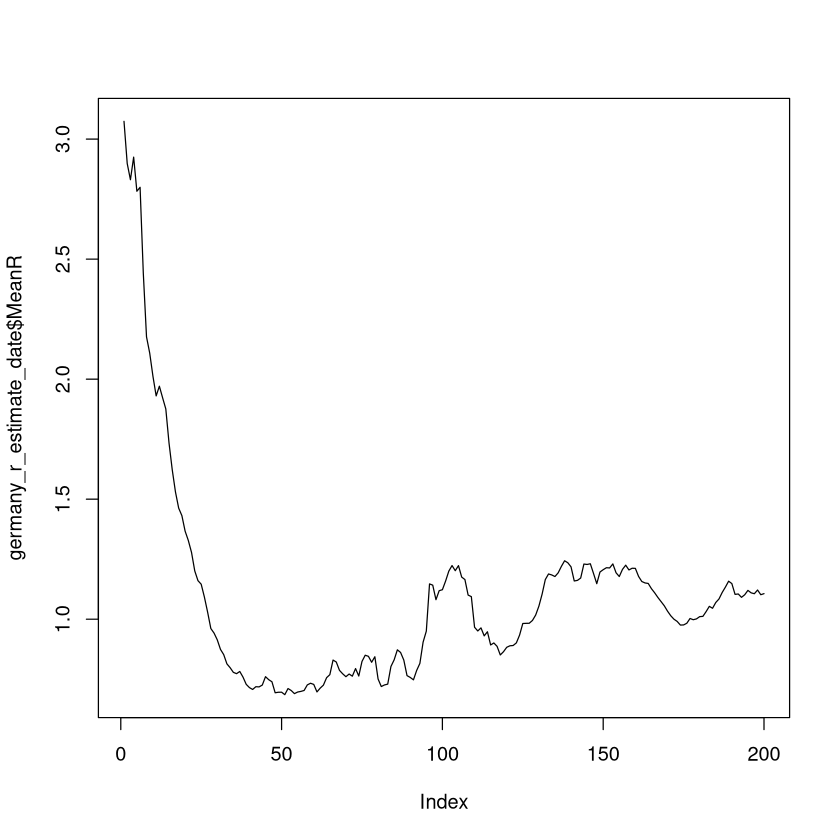

In [30]:
r_estimate <- read.csv("../r-naught/r_estimates.csv")

# View(r_estimate)

# rnaught <- r_estimate$MeanR
# rownames(rnaught) <- r_estimate$Date

# rnaught <- as.xts(rnaught)


germany_r_estimate = r_estimate[r_estimate$Code == 'DE', ]
germany_r_estimate_date = germany_r_estimate[c(1:200), ]
r_naught = mean(germany_r_estimate_date$MeanR[c(1:40)])
plot(germany_r_estimate_date$MeanR, type = "l")

germany_r_estimate_date$Date[c(1, 150)]

- 1 month of delay between data + 14 days of recovery time are why I chose 26 days later in the sim.

$$R_0 = \tau \overline{c} d$$

$$\tau = \frac{R_0}{\overline{c} d}$$

$$\beta = \overline{c} \tau$$

$$\beta = \frac{R_0}{d}$$ 

#### Writing $\beta$ as a function
- $a_1 t + a_2 t^2 + a_3 t^3 + a_4 t^4 + a_0 = \beta (t)$

In [31]:
c = 7.95
d = 14
# r_naught = 6

tau <- r_naught/(c*d)

beta <- tau * c

# print("C = " + c ", d = " + d + ", tau = " + tau)

In [32]:
fit_df <- data.frame(x=1:150,
                 y=c((germany_r_estimate_date$MeanR/d)[1:150]))

fit <- lm(y~poly(x,6,raw=TRUE), data=fit_df)

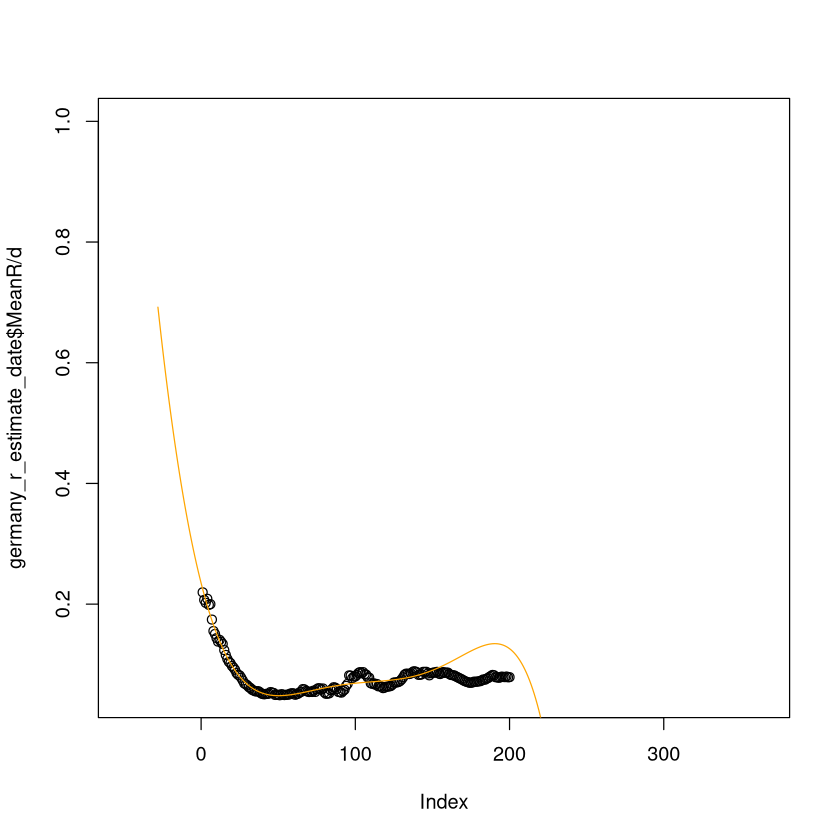

In [33]:
plot(germany_r_estimate_date$MeanR/d, xlim=c(-50,365), ylim=c(0.05, 1))

x_axis <- -28:365

lines(x_axis, predict(fit, data.frame(x=x_axis)), col='orange')

In [34]:
firstCaseDate

[1] "2020-01-31"

### SIR Model

$$
\begin{eqnarray}
    \frac{dS}{dt} & = & - \beta S I \\
    \frac{dI}{dt} & = & \beta S I - \gamma I \\
    \frac{dR}{dt} & = & \gamma I \\
\end{eqnarray}
$$

If $\beta \cdot S_0 - \gamma < 0$, then we have an epidemic, otherwise not.

In our case, with Italy, if $\beta$ is $1.7$, $\gamma$ is $1$ and $S_0$ is $60000000$, then our $R_0$ is: 

$$R_0 = \tau \$$

By plugging in our numbers we get:

$$\frac{1.7 \cdot 60000}{1} = 102000000$$

Which means that our $R_0$ is way bigger than 0

In [35]:
# Model inputs

# S: Susceptible (All population)
# I: Infected (Infected)
# R: Recovered (Dead OR Recovered)

susceptible <- 83e+06 # Source: https://www.statista.com/statistics/786485/population-by-gender-in-italy/#:~:text=Population%20in%20Italy%20in%202020%2C%20by%20gender&text=As%20of%20January%202020%2C%2060.2,roughly%2016%20million%20people%20lived.
infected <- firstInfection
recovered <- 0

initial_state_values = c(s = susceptible/totalPopulation, i = infected/totalPopulation, r = recovered/totalPopulation)

# If beta * S_0 - gamma < 0, then we have an epidemic, otherwise not.

# Parameters
# Beta: The effective transmission rate
# Gamma: The effective recovery rate
# R0: (beta * S_0)/gamma

# The beta for covid is estimated to be ranging from 1.5 to 6.68. With median of 2.79. Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7751056/#:~:text=R0%20of%20COVID%2D19,-R0%20of&text=compared%2012%20studies%20published%20from,an%20interquartile%20range%20of%201.16.
# We can simulate this scenario by having our beta as 0.27 and our gamma as 0.1 

parameters = c(gamma = 1/d)
# parameters = c(gamma = 1, beta = 1.7)
#parameters = c(gamma = 2, beta = 2.4)

# Time points

time = seq(from = 1,to = analysis_days, by = 1)

# SIR model function 

sir_model <- function(time,state,parameters){
  with(as.list(c(state,parameters)),{
    beta = data.frame(predict(fit, data.frame(x=time-25)))[1,]
      
    ds = - beta*s*i
    di = beta*s*i - gamma*i
    dr = gamma*i
      
    # print("printing beta")  
    # print(beta)
          
    return(list(c(ds,di,dr)))
  }
  )
}


#Solving the differential equations
output <- as.data.frame(ode(y = initial_state_values, func = sir_model, parms = parameters, times = time))

out_long = melt(output , id = "time")

colnames(out_long) <- c("Time", "Variable", "Value")


# dim(out_long)

#### SIR Model Graph

In [36]:
Susceptible <- out_long[1:analysis_days, 3]
Infected <- out_long[(analysis_days + 1):(analysis_days*2), 3]
Recovered <- out_long[(analysis_days*2 + 1):(analysis_days*3), 3]

plot_data <- as.data.frame(cbind(Susceptible, Infected, Recovered))
colnames(plot_data) <- c("Susceptbile", "Infected", "Recovered")
rownames(plot_data) <- dates

plot_data <- as.xts(plot_data)

head(plot_data)

           Susceptbile     Infected    Recovered
2020-01-31   1.0000000 1.204819e-08 0.000000e+00
2020-02-01   1.0000000 2.298687e-08 1.532660e-09
2020-02-02   1.0000000 4.235776e-08 4.360335e-09
2020-02-03   0.9999999 6.788451e-08 8.184531e-09
2020-02-04   0.9999999 1.079263e-07 1.443591e-08
2020-02-05   0.9999998 1.682604e-07 2.426264e-08

In [37]:
dygraph(plot_data) %>%
    dyAxis("y", label = "People") %>%
    dyAxis("x", label = "Date")

HTML widgets cannot be represented in plain text (need html)

In [38]:
plot_data_daily <- compute_deltas(plot_data)

dygraph(plot_data_daily) %>%
    dyAxis("y", label = "People (Millions)") %>%
    dyAxis("x", label = "Date")

HTML widgets cannot be represented in plain text (need html)

In [39]:
# All cases

all_sir_cases <- sum(plot_data$Infected)

print(all_sir_cases)

[1] 0.07647527


#### SIR Model Comparison

##### Susceptible

In [40]:
# compare_data_sir <- minmax_normalizeplot_data$Susceptbile)
# compare_data_real <- minmax_normalize(totalPopulation - real_data_total$Cases)

# # View(as.xts(cbind(compare_data_real, compare_data_sir)))

# dygraph(as.xts(cbind(compare_data_real, compare_data_sir)))

In [41]:
compare_data_sir <- plot_data$Susceptbile * totalPopulation
compare_data_real <- totalPopulation - real_data_total$Cases

# View(compare_data_real)
# View(as.xts(cbind(compare_data_real, compare_data_sir)))

dygraph(as.xts(cbind(compare_data_real, compare_data_sir)))

HTML widgets cannot be represented in plain text (need html)

##### Infected

In [42]:
compare_data_sir <- plot_data_daily$Infected * totalPopulation
compare_data_real <- real_data_total$Cases

# dim(plot_data_daily$Infected)
# dim(real_data_total$Cases)

# View(as.xts(cbind(compare_data_real, compare_data_sir)))

# dygraph(as.xts(cbind(compare_data_real, compare_data_sir)))

#### Recovered

In [43]:
compare_data_sir <- plot_data$Recovered * totalPopulation
compare_data_real <- real_data_total$Recoveries

# View(as.xts(cbind(compare_data_real, compare_data_sir)))

dygraph(as.xts(cbind(compare_data_real, compare_data_sir)))

HTML widgets cannot be represented in plain text (need html)

### SEIR Model

In [44]:
# State values:

# 1: Susceptibles
# 2: Exposed, this means infected, but still not infectious
# 3: Infected
# 4: Recovered or Dead

# Parameters:
# Beta: Same as before
# Gamma: Same as before
# Delta: 1/latent period

contact_rate = 2                  # number of contacts per day
transmission_probability = 0.27      # transmission probability
infectious_period = 15                 # infectious period
latent_period = 7                   # latent period

beta_value = contact_rate * transmission_probability
gamma_value = 1 / infectious_period
delta_value = 1 / latent_period

Ro = beta_value / gamma_value

parameter_list = c (beta = beta_value, gamma = gamma_value, delta = delta_value)

# Susceptibles
susceptibles <- 83e+06 # Source: https://www.statista.com/statistics/786485/population-by-gender-in-italy/#:~:text=Population%20in%20Italy%20in%202020%2C%20by%20gender&text=As%20of%20January%202020%2C%2060.2,roughly%2016%20million%20people%20lived.
infected <- firstInfection
recovered <- 0
exposed <- 0

total_pop <- susceptibles + infected + recovered + exposed

initial_values = c (S = susceptibles/total_pop, E = infected/total_pop, I = recovered/total_pop, R = exposed/total_pop)

timepoints <- seq(0, analysis_days, by=1)

SEIR <- function (current_timepoint, state_values, parameters) {
  # create state variables (local variables)
  S = state_values [1]        # susceptibles
  E = state_values [2]        # exposed
  I = state_values [3]        # infectious
  R = state_values [4]        # recovered
  
  with ( 
    as.list (parameters),     # variable names within parameters can be used 
         {
           # compute derivatives
           dS = (-beta * S * I)
           dE = (beta * S * I) - (delta * E)
           dI = (delta * E) - (gamma * I)
           dR = (gamma * I)
           
           # combine results
           results = c (dS, dE, dI, dR)
           list (results)
         }
    )
}

output = lsoda(initial_values, timepoints, SEIR, parameter_list)

# head(output)

#### SEIR Model Graph

In [45]:
output <- output[-1, ]

plot_data <- as.data.frame(cbind(output[, 2], output[, 3], output[, 4], output[, 5]))
rownames(plot_data) <- dates

colnames(plot_data) <- c("Susceptible", "Exposed", "Infected", "Recovered")

plot_data <- as.xts(plot_data)

dygraph(plot_data) %>%
    dyAxis("y", label = "People (Percentage)") %>%
    dyAxis("x", label = "Date (Days)")

HTML widgets cannot be represented in plain text (need html)

#### SEIR Model Daily Graph

In [46]:
plot_data_daily <- compute_deltas(plot_data)

dygraph(plot_data_daily) %>%
    dyAxis("y", label = "People (Millions)") %>%
    dyAxis("x", label = "Date")

HTML widgets cannot be represented in plain text (need html)

#### SEIR Model Comparison

In [47]:
compare_data_sir <- minmax_normalize(plot_data$Recovered)
compare_data_real <- minmax_normalize(real_data_total$Recoveries)

# View(as.xts(cbind(compare_data_real, compare_data_sir)))

dygraph(as.xts(cbind(compare_data_real, compare_data_sir)))

HTML widgets cannot be represented in plain text (need html)

In [48]:
compare_data_sir <- minmax_normalize(plot_data$Infected)
compare_data_real <- minmax_normalize(real_data_total$Cases)

# View(as.xts(cbind(compare_data_real, compare_data_sir)))

dygraph(as.xts(cbind(compare_data_real, compare_data_sir)))

HTML widgets cannot be represented in plain text (need html)

Here the prediction should contain cumulative data, else it looks broken

### SIDARTHE Model

#### States:

- **S**usceptible
- **I**nfected
- **D**iagnosed
- **A**iling
- **R**ecognized
- **T**hreatened
- **H**ealing
- **E**xtinct

There are three subsystems to these model. **S**, or the susceptible individuals, **I, D, A, R and T**, the infected individuals, and **H and E**, healed or defunct.

Only when **I+D+A+R+T = 0**, then the remaining variables **S, H and E** are at equilibrium.

#### Ordinary differential equations

$$
\begin{eqnarray}
    \dot{S}(t) & = & -S(t)(\alpha I(t) + \beta D(t) + \gamma A(t) + \delta R(t)) \\
    \dot{I}(t) & = & S(t)(\alpha I(t) + \beta D(t) + \gamma A(t) + \delta R(t)) - (\epsilon + \zeta + \lambda)I(t) \\
    \dot{D}(t) & = & \epsilon I(t) - (\eta + \rho)D(t) \\
    \dot{A}(t) & = & \zeta I(t) - (\theta + \mu + \kappa)A(t) \\
    \dot{R}(t) & = & \eta D(t) + \theta A(t) - (\nu + \xi)R(t) \\
    \dot{T}(t) & = & \mu A(t) + \nu R(t) - (\sigma + \tau)T(t) \\
    \dot{H}(t) & = & \lambda I(t) + \rho D(t) + \kappa A(t) + \xi R(t) + \sigma T(t) \\
    \dot{E}(t) & = & \tau T(t) \\
\end{eqnarray}
$$

- All the uppercase Latin letters (S, I, D, ...) represent the fraction of the population in a given state, so that the sum of that equals the total population
- The parameters, denoted by lowercase greek letters, are positive numbers.
    - $\alpha, \beta, \gamma \text{ and } \delta$ respectively denote the transmission rate (the probability of disease transmission in a single contact multiplied by the average number of contacts per person) due to contacts between a susceptible subject and an infected, a diagnosed, an ailing or a recognized subject.
    - $\epsilon \text{ and } \theta$ capture the probability rate of detection, relative to asymptomatic and symptomatic cases, respectively. These parameters, also modifiable, reflect the level of attention on the disease and the number of tests performed over the population: they can be increased by enforcing a massive contact tracing and testing campaign
    - $\zeta$ and $\eta$ denote the probability rate at which an infected subject, respectively not aware and aware of being infected, develops clinically relevant symptoms, and are comparable in the absence of specific treatment.
    - $\mu$ and $\nu$ respectively denote the rate at which undetected and detected infected subjects develop life-threatening symptoms; they are comparable if there is no known specific treatment that is effective against the disease, otherwise µ may be larger. Conversely, ν may be larger because infected individuals with more acute symptoms, who have a higher risk of worsening, are more likely to have been diagnosed.
    - $\tau$ denotes the mortality rate (for infected subjects with life-threatening symptoms).
    - $\lambda, \kappa, \xi, \rho \text{ and } \theta$ denote the rate of recovery for the five classes of infected sub- jects; they may differ significantly if an appropriate treatment for the disease is known and adopted for diagnosed patients, but are probably comparable otherwise.
    

# SEIOPR Model

In [49]:
SEIOPR <- function(analysis_time, state_values, parameters) {
    S = state_values[1]        # susceptibles
    E = state_values[2]        # exposed
    I = state_values[3]        # infectious
    O = state_values[4]
    P = state_values[5]
    D = state_values[6]
    
    with ( 
        as.list (parameters),     # variable names within parameters can be used 
            {
                dS <- xi * P - beta * S * I - nu * S
                dE <- beta * S * I - sigma * E
                dI <- sigma * E - delta * I - gamma * I
                dO <- gamma * I - omega * O - eta * O
                dP <- delta * I + eta * O + nu * S
                dD <- omega * O
                 
                return(list(c(dS, dE, dI, dO, dP, dD)))

            }
    )
}

In [50]:
beta  <- 1
sigma <- 1
gamma <- 1
omega <- 1
delta <- 1
xi    <- 1
nu    <- 1
eta   <- 1

analysis_days <- 365

timepoints <- seq(0, analysis_days, by=1)

parameters <- c(beta, sigma, gamma, omega, delta, xi, nu, eta)

susceptibles <- 83e+06 # Source: https://www.statista.com/statistics/786485/population-by-gender-in-italy/#:~:text=Population%20in%20Italy%20in%202020%2C%20by%20gender&text=As%20of%20January%202020%2C%2060.2,roughly%2016%20million%20people%20lived.
exposed <- 0
infected <- firstInfection
hospitalized <- 0
dead <- 0
protected <- 0

total_pop <- susceptibles + exposed + infected + hospitalized + protected + dead

initial_values = c (S = susceptibles, E = exposed, I = infected, O = hospitalized, P = protected, D = dead)

output = lsoda(initial_values, timepoints, SEIOPR, parameters)

dates <- seq(as.Date(firstCaseDate), by = "days", length.out = nrow(output))

head(dates)

rownames(output) <- dates

drops <- c("time")
output[ , !(names(output) %in% drops)]

[1] "2020-01-31" "2020-02-01" "2020-02-02" "2020-02-03" "2020-02-04"
[6] "2020-02-05"

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”
Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
⋮    
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657

In [51]:
head(output)
dygraph(as.xts(output))

time S            E         I        O        P         D       
18292 0    8.300000e+07         0        1        0         0        0
18293 1    1.031116e+00  37066103 20591012  8279423  21231702  4288890
18294 2    2.718838e+00  37386504 18023331  9064420  49002509 13284159
18295 3    3.369948e+00  55224480 23285565 10269524  78471149 22705337
18296 4    3.423964e+00  84074765 34811810 14533802 119194364 34858315
18297 5    3.417069e+00 127432122 52759371 21856796 180282431 52780005

Warning message in dygraph(as.xts(output)):
“restarting interrupted promise evaluation”


ERROR: Error in as.POSIXlt.character(x, tz, ...): character string is not in a standard unambiguous format
